<a href="https://colab.research.google.com/github/eliaswalyba/digital-genius/blob/master/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Engineer / Conversational AI Engineer - Technical
In this test you will build a system that helps to classify simple conversations. This test can be treated as an opportunity to show skills and knowledge, as a learning exercise and as a prompt for further interviews in your process with DigitalGenius.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.set()

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/eliaswalyba/digital-genius/master/tech_test_data.csv")
df = df.sample(frac=1).reset_index(drop=True)
df.head(5)

,message,case_type,conversation_id,message_id,message_number,message_source
0,Order ID 987yh512 and account number 32430984,order_status,14,59,3,customer
1,Of course! Let me assist. Please share your ac...,order_status,14,58,2,agent
2,Of course! Let me assist. Please share your ac...,cancel_order,1,2,2,agent
3,"Yeah account number 09832453, order BSD932X0",order_status,13,55,3,customer
4,"Great, thanks! I’ve just cancelled your order....",cancel_order,8,35,4,agent


In [0]:
df = df[~df['message'].isnull()]
df.head(5)

,message,case_type,conversation_id,message_id,message_number,message_source
0,Order ID 987yh512 and account number 32430984,order_status,14,59,3,customer
1,Of course! Let me assist. Please share your ac...,order_status,14,58,2,agent
2,Of course! Let me assist. Please share your ac...,cancel_order,1,2,2,agent
3,"Yeah account number 09832453, order BSD932X0",order_status,13,55,3,customer
4,"Great, thanks! I’ve just cancelled your order....",cancel_order,8,35,4,agent


In [0]:
df['message_length'] = df['message'].astype(str).apply(len)
df['message_words'] = df['message'].apply(lambda x: len(str(x).split()))

In [0]:
df.head(5)

,message,case_type,conversation_id,message_id,message_number,message_source,message_length,message_words
0,Order ID 987yh512 and account number 32430984,order_status,14,59,3,customer,45,7
1,Of course! Let me assist. Please share your ac...,order_status,14,58,2,agent,103,20
2,Of course! Let me assist. Please share your ac...,cancel_order,1,2,2,agent,106,20
3,"Yeah account number 09832453, order BSD932X0",order_status,13,55,3,customer,44,6
4,"Great, thanks! I’ve just cancelled your order....",cancel_order,8,35,4,agent,77,13


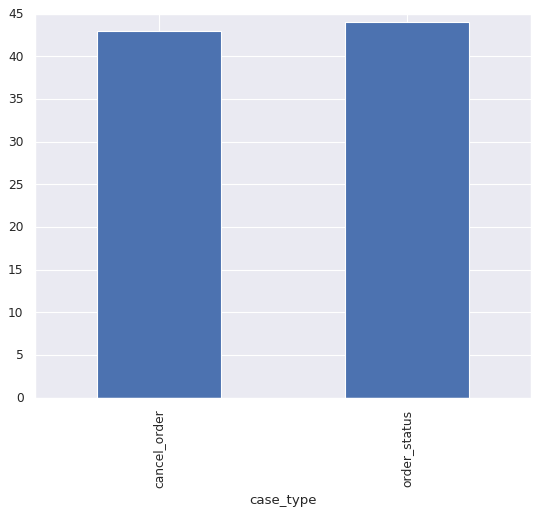

In [0]:
df.groupby('case_type').message.count().plot.bar(ylim=0)

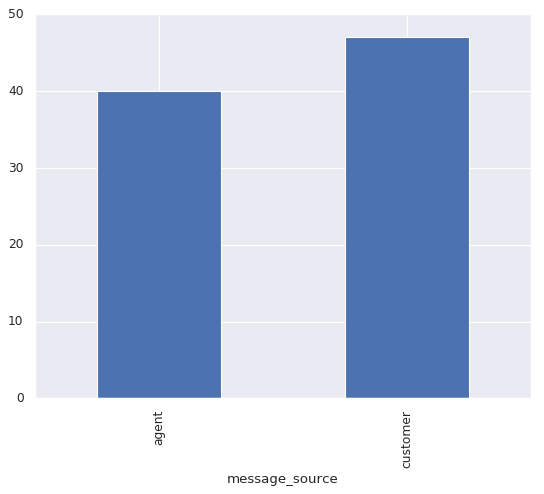

In [0]:
df.groupby('message_source').message.count().plot.bar(ylim=0)

(array([0.01359535, 0.00494376, 0.01483129, 0.00617971, 0.021011  ,
        0.00247188, 0.01483129, 0.00247188, 0.        , 0.02719071]),
 array([ 18. ,  27.3,  36.6,  45.9,  55.2,  64.5,  73.8,  83.1,  92.4,
        101.7, 111. ]),
 <a list of 10 Patch objects>)

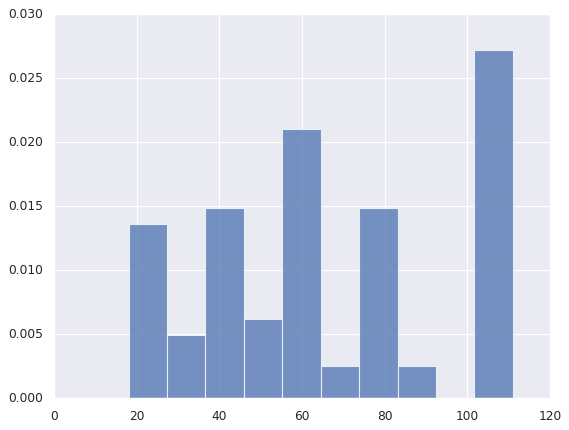

In [0]:
plt.hist(df.message_length, density=True, alpha=0.75)

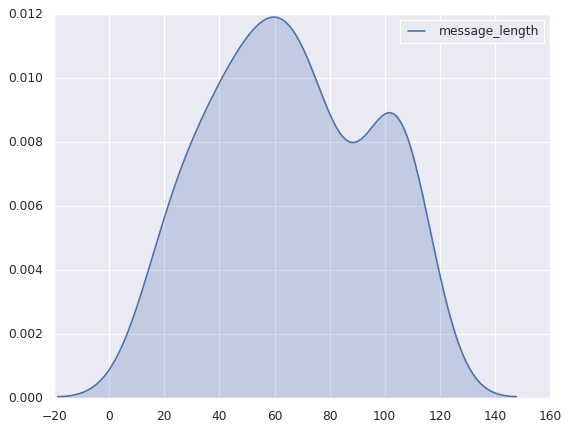

In [0]:
sns.kdeplot(df.message_length, shade=True)

(array([0.04597701, 0.04597701, 0.05747126, 0.04022989, 0.0862069 ,
        0.07471264, 0.01149425, 0.01149425, 0.11494253, 0.01149425]),
 array([ 3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23.]),
 <a list of 10 Patch objects>)

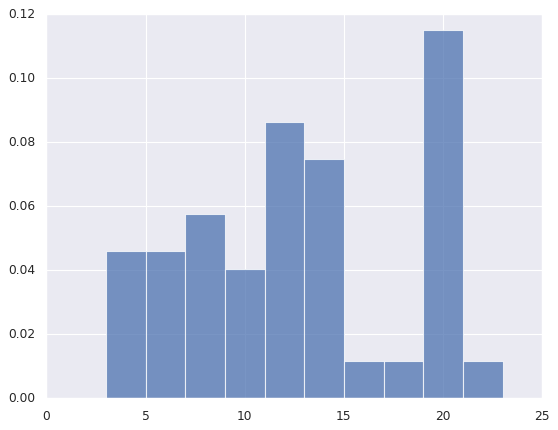

In [0]:
plt.hist(df.message_words, density=True, alpha=0.75)

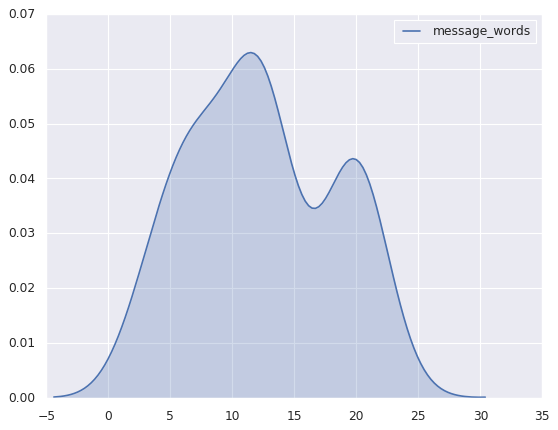

In [0]:
sns.kdeplot(df.message_words, shade=True)

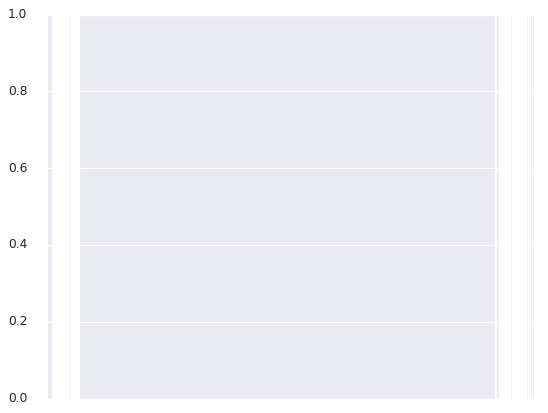

In [0]:
df.message_source.hist()

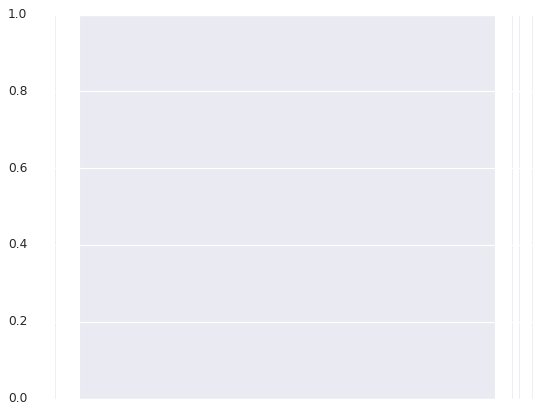

In [0]:
df.case_type.hist()

([array([0.        , 0.00851426, 0.0063857 , 0.01383567, 0.00744998,
         0.01596424, 0.01383567, 0.00212857, 0.00106428, 0.02341422]),
  array([0.06492124, 0.02767135, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ])],
 array([  3. ,  13.8,  24.6,  35.4,  46.2,  57. ,  67.8,  78.6,  89.4,
        100.2, 111. ]),
 <a list of 2 Lists of Patches objects>)

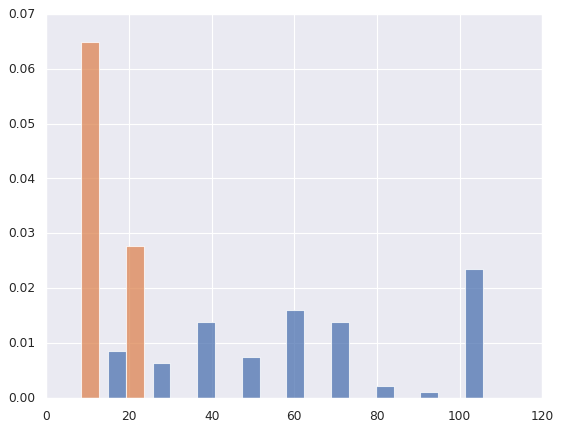

In [0]:
plt.hist([df.message_length, df.message_words], density=True, alpha=0.75)

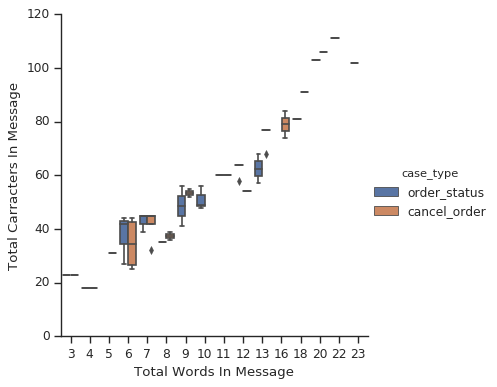

In [0]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("message_words", "message_length", "case_type", data=df, kind="box")
    g.set_axis_labels("Total Words In Message", "Total Carracters In Message");

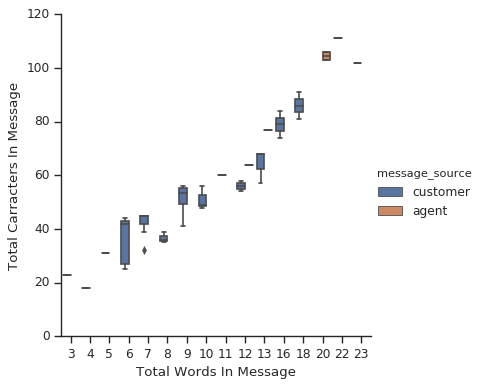

In [0]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("message_words", "message_length", "message_source", data=df, kind="box")
    g.set_axis_labels("Total Words In Message", "Total Carracters In Message");

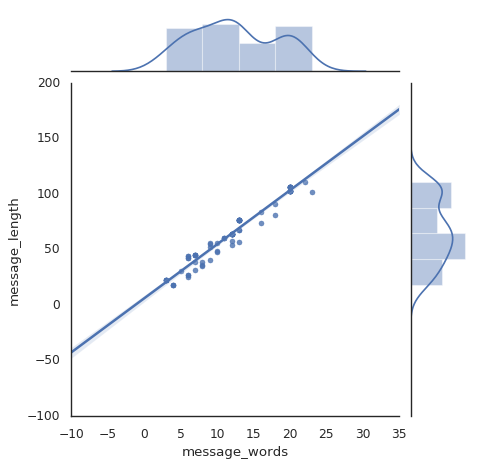

In [0]:
with sns.axes_style('white'):
    sns.jointplot("message_words", "message_length", data=df, kind='reg')

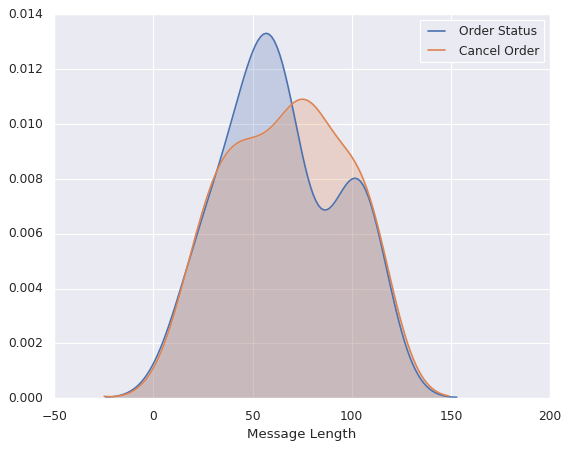

In [0]:
sns.kdeplot(df[df.case_type=='order_status'].message_length, label='Order Status', shade=True)
sns.kdeplot(df[df.case_type=='cancel_order'].message_length, label='Cancel Order', shade=True)
plt.xlabel('Message Length');

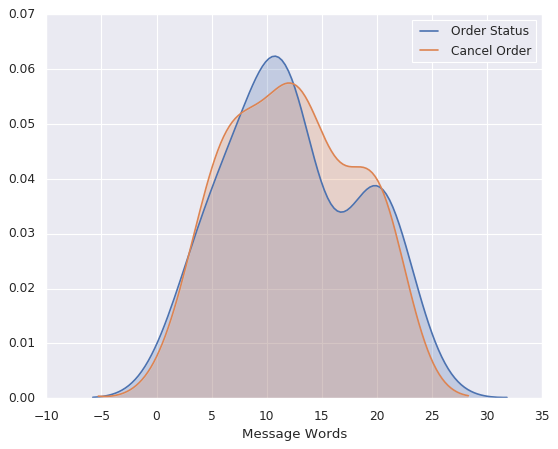

In [0]:
sns.kdeplot(df[df.case_type=='order_status'].message_words, label='Order Status', shade=True)
sns.kdeplot(df[df.case_type=='cancel_order'].message_words, label='Cancel Order', shade=True)
plt.xlabel('Message Words');

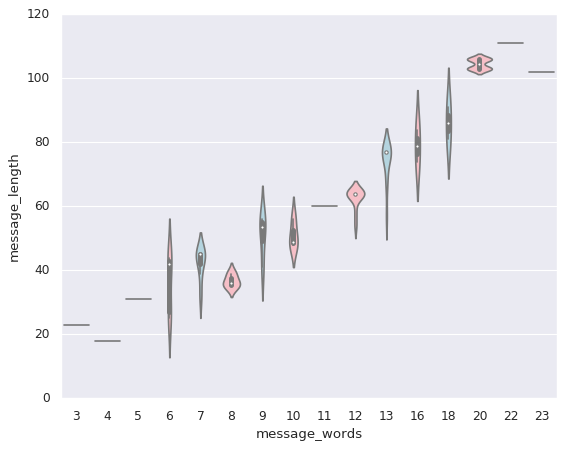

In [0]:
sns.violinplot("message_words", "message_length", data=df,
               palette=["lightblue", "lightpink"]);